<a href="https://colab.research.google.com/github/ZahidHasanStat/ML-Algorithms/blob/main/mlfm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import AdaBoostClassifier

In [61]:
#Importing the Dataset
fv = pd.read_csv('vf.csv')
fv.head()

,Age,gen,Ms,edu,occu,ft,fm,E.P,hf,relig,resid,wi,ibc,inac,lj,fv
0,23,1,0,1,1,1,5,1,1,1,1,1,6,2,0,0
1,23,1,0,3,1,2,3,1,1,1,1,1,3,1,1,1
2,23,1,0,2,1,1,4,4,1,1,2,1,3,3,1,0
3,23,1,0,1,1,1,3,1,1,1,1,1,3,2,0,1
4,23,1,0,2,1,2,4,2,1,1,1,1,3,2,0,1


In [ ]:
#EDA using Pandas Profiling
profile = ProfileReport(fv, title='Pandas Profiling Report on fv Dataset', html={'style':{'full_width':True}})
profile

TypeError: ignored

In [62]:
inputs = fv.drop('fv',axis='columns')
target = fv.fv

In [ ]:
inputs.head()
target

0      0
1      1
2      0
3      1
4      1
      ..
506    0
507    0
508    1
509    0
510    1
Name: fv, Length: 511, dtype: int64

In [63]:
#Splitting the data into training and test
from sklearn.model_selection import train_test_split
#Test set=20%
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state=24)

In [ ]:
x_test.shape

(103, 15)

In [64]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [65]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [66]:
xg_reg.fit(x_train,y_train)

y_xg = xg_reg.predict(x_test)

[15:09:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
abc = AdaBoostClassifier(n_estimators=106,
                         learning_rate=.5)

In [ ]:
abm = abc.fit(x_train, y_train)
y_ad = abm.predict(x_test)


In [ ]:
abm = abc.fit(x_train, y_train)
y_ad = abm.predict(x_test)


In [74]:
rmse = np.sqrt(mean_squared_error(y_test, y_xg))
print("RMSE: %f" % (rmse))

RMSE: 0.477902


In [ ]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_ad))

Accuracy: 0.6310679611650486


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.65


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Importing different algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
lr=LogisticRegression()
svc=LinearSVC()
rfc=RandomForestClassifier()
dt = tree.DecisionTreeClassifier()

In [ ]:
#Fitting Decision Trees
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Fitting Logistic Regression
lr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Fitting Random Forest Classifier
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Fitting SVM
svc.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
#Predicting on test data
y_dt=dt.predict(x_test)
y_lr=lr.predict(x_test)
y_rfc=rfc.predict(x_test)
y_svc=svc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix

[[44 18]
 [18 23]]


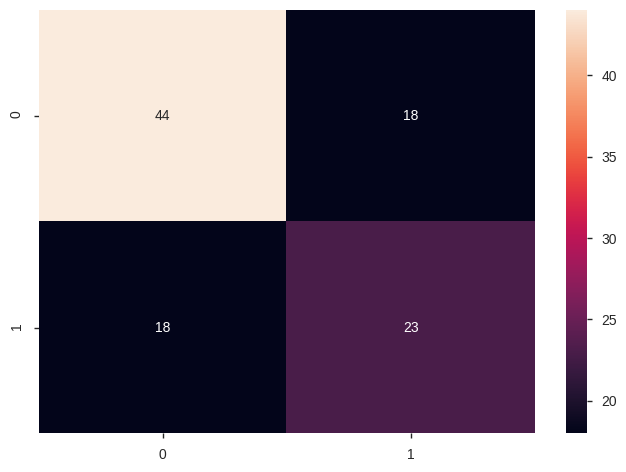

In [ ]:
#cm for Logistic Regression
cf_lr = confusion_matrix(y_test, y_lr)
print(cf_lr)
sns.heatmap(cf_lr, annot=True)

[[37 25]
 [11 30]]


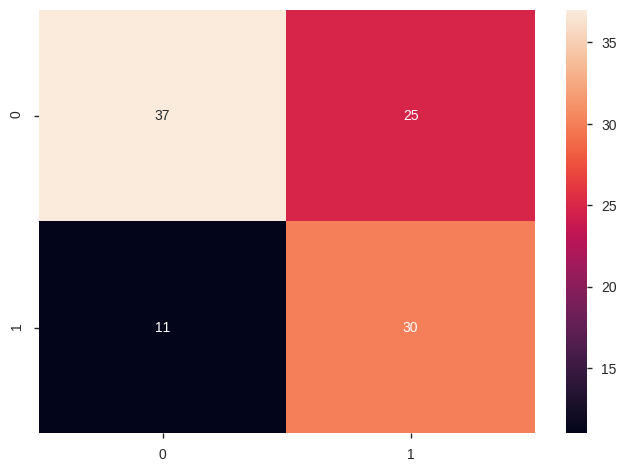

In [ ]:
#cm for Decision Tree
cf_dt = confusion_matrix(y_test, y_dt)
print(cf_dt)
sns.heatmap(cf_dt, annot=True)

[[45 17]
 [18 23]]


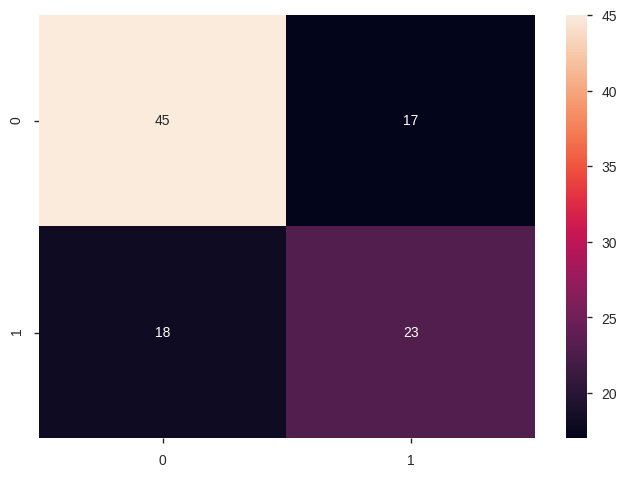

In [ ]:
#cm for Random Forest
cf_rfc = confusion_matrix(y_test, y_rfc)
print(cf_rfc)
sns.heatmap(cf_rfc, annot=True)

[[49 13]
 [27 14]]


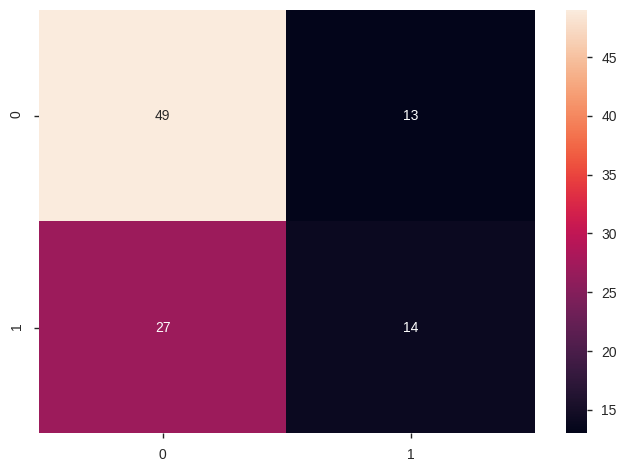

In [ ]:
#cm for SVM
cf_svc = confusion_matrix(y_test, y_svc)
print(cf_svc)
sns.heatmap(cf_svc, annot=True)

In [ ]:
#fpr=false positive Rate,tpr=True positive Rate
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

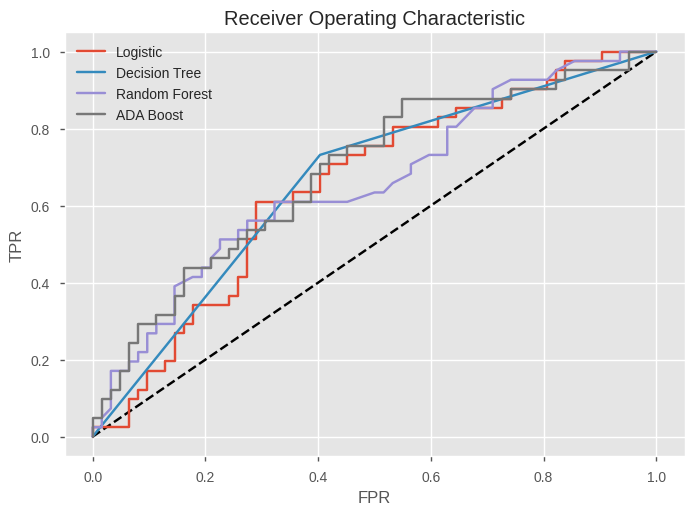

In [71]:
#ROC Curve
plt.style.use('ggplot')
from sklearn.metrics import roc_curve
y_pred_prob1 = lr.predict_proba(x_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = dt.predict_proba(x_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = rfc.predict_proba(x_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = abm.predict_proba(x_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic")
plt.plot(fpr2, tpr2, label= "Decision Tree")
plt.plot(fpr3, tpr3, label= "Random Forest")
plt.plot(fpr4, tpr4, label= "ADA Boost")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()